In [1]:
from __future__ import  absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np 
import pandas as pd

TensorFlow 2.x selected.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# Loading Data
#!ls /content/drive/'My Drive'/'Colab Notebooks'
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/selected_data_ISONE.csv')
data.head()

date  year  month  day  weekday  hour   demand  temperature
0  2003/3/1  2003      3    1        7     1  12863.0           23
1  2003/3/1  2003      3    1        7     2  12389.0           22
2  2003/3/1  2003      3    1        7     3  12155.0           21
3  2003/3/1  2003      3    1        7     4  12072.0           21
4  2003/3/1  2003      3    1        7     5  12160.0           22

In [0]:
import matplotlib.pyplot as plt

Data from March 2003 to December 2005


In [0]:
# Series Plot

def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

In [0]:
# Entire Series
series = data.iloc[:33648]
series = series['demand'].values
norm = series.max()
series = series/ norm
split_time = 24888
time = np.arange(len(series))

x_train = series[:split_time]
x_valid = series[split_time:]

time_valid = time[split_time:]

In [0]:
# Naive Forecast
naive_forecast = series[split_time - 1:-1]

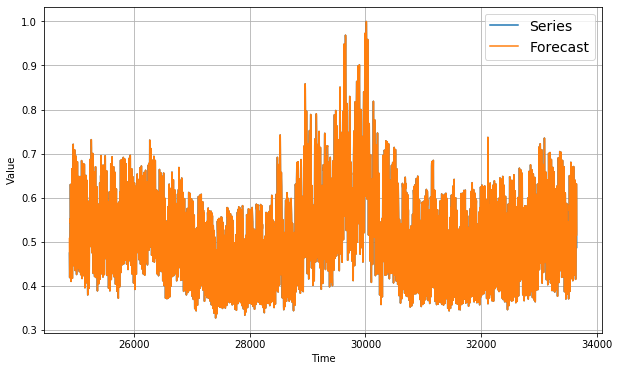

In [8]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, label="Series")
plot_series(time_valid, naive_forecast, label="Forecast")

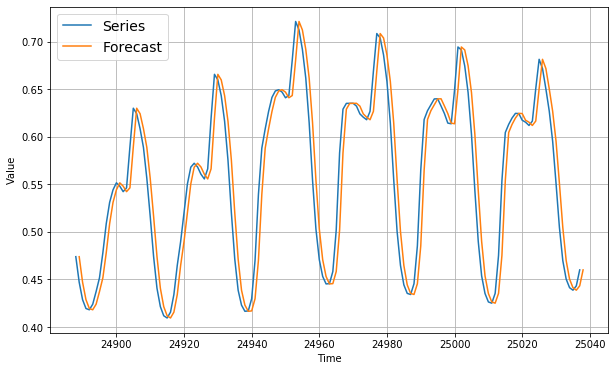

In [9]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start=0, end=150, label="Series")
plot_series(time_valid, naive_forecast, start=1, end=151, label="Forecast")

In [10]:
errors = naive_forecast - x_valid
abs_errors = np.abs(errors)
mae = abs_errors.mean()
mae

0.02173053607920892

In [11]:
mape = tf.keras.losses.MAPE(x_valid,naive_forecast)
mape

<tf.Tensor: id=13, shape=(), dtype=float64, numpy=4.212490959065769>

In [13]:
mape = np.mean(np.abs((x_valid - naive_forecast) / x_valid)) * 100
mape

4.212490959065769

In [14]:
test = data.iloc[split_time:33648]
test.head()

date  year  month  day  weekday  hour   demand  temperature
24888  2006/1/1  2006      1    1        1     1  13091.0           28
24889  2006/1/1  2006      1    1        1     2  12348.0           28
24890  2006/1/1  2006      1    1        1     3  11842.0           28
24891  2006/1/1  2006      1    1        1     4  11586.0           27
24892  2006/1/1  2006      1    1        1     5  11549.0           26

In [15]:
test.tail()

date  year  month  day  weekday  hour   demand  temperature
33643  2006/12/31  2006     12   31        1    20  16400.0           30
33644  2006/12/31  2006     12   31        1    21  15742.0           31
33645  2006/12/31  2006     12   31        1    22  15020.0           30
33646  2006/12/31  2006     12   31        1    23  14233.0           29
33647  2006/12/31  2006     12   31        1    24  13442.0           29

In [16]:
# January Forecast
#def monthly(test):
test = test.set_index('date')
test.head()

year  month  day  weekday  hour   demand  temperature
date                                                           
2006/1/1  2006      1    1        1     1  13091.0           28
2006/1/1  2006      1    1        1     2  12348.0           28
2006/1/1  2006      1    1        1     3  11842.0           28
2006/1/1  2006      1    1        1     4  11586.0           27
2006/1/1  2006      1    1        1     5  11549.0           26

In [17]:
# January 2006 test
jan_test = test.loc['2006/1/1':'2006/1/31']
jan_test.head()

year  month  day  weekday  hour   demand  temperature
date                                                           
2006/1/1  2006      1    1        1     1  13091.0           28
2006/1/1  2006      1    1        1     2  12348.0           28
2006/1/1  2006      1    1        1     3  11842.0           28
2006/1/1  2006      1    1        1     4  11586.0           27
2006/1/1  2006      1    1        1     5  11549.0           26

In [18]:
jan_test.tail()

year  month  day  weekday  hour   demand  temperature
date                                                            
2006/1/31  2006      1   31        3    20  18614.0           31
2006/1/31  2006      1   31        3    21  17769.0           31
2006/1/31  2006      1   31        3    22  16555.0           31
2006/1/31  2006      1   31        3    23  14921.0           31
2006/1/31  2006      1   31        3    24  13448.0           31

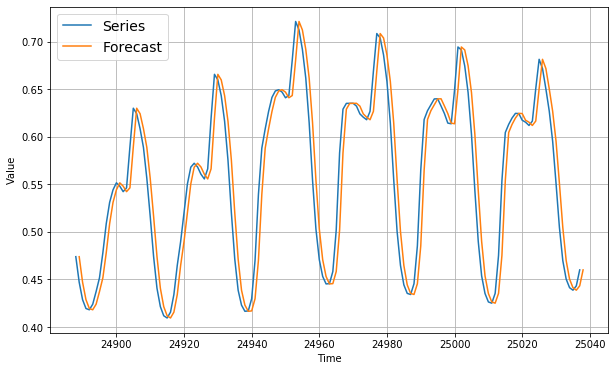

In [19]:
norm = data.iloc[:33648]
norm = norm['demand'].values.max()
test_jan = (jan_test['demand'].values) / norm
test_naive = naive_forecast[:len(test_jan)] 
time_test = time_valid[:len(test_jan)]

plt.figure(figsize=(10, 6))
plot_series(time_test, test_jan, start=0, end=150, label="Series")
plot_series(time_test, test_naive, start=1, end=151, label="Forecast")


In [20]:
mape = tf.keras.losses.MAPE(test_jan,test_naive)
mape

<tf.Tensor: id=27, shape=(), dtype=float64, numpy=4.124468841123489>

In [21]:
mae = tf.keras.losses.MAE(test_jan, test_naive)
mae

<tf.Tensor: id=33, shape=(), dtype=float64, numpy=0.022256978425331843>

In [0]:
# Moving Average
def moving_average_forecast(series, window_size):
  """Forecasts the mean of the last few values.
     If window_size=1, then this is equivalent to naive forecast
     This implementation is *much* faster than the previous one"""
  mov = np.cumsum(series)
  mov[window_size:] = mov[window_size:] - mov[:-window_size]
  return mov[window_size - 1:-1] / window_size

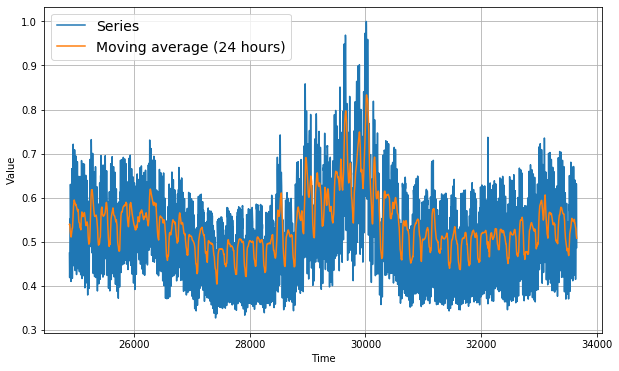

In [109]:
window_size = 24
moving_avg = moving_average_forecast(series, window_size)[split_time - window_size:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, label="Series")
plot_series(time_valid, moving_avg, label="Moving average (24 hours)")

In [110]:
mae = tf.keras.losses.MAE(x_valid, moving_avg)
mae

<tf.Tensor: id=391, shape=(), dtype=float64, numpy=0.07570352326945344>

In [111]:
mape = tf.keras.losses.MAPE(x_valid, moving_avg)
mape

<tf.Tensor: id=405, shape=(), dtype=float64, numpy=15.116731662064332>

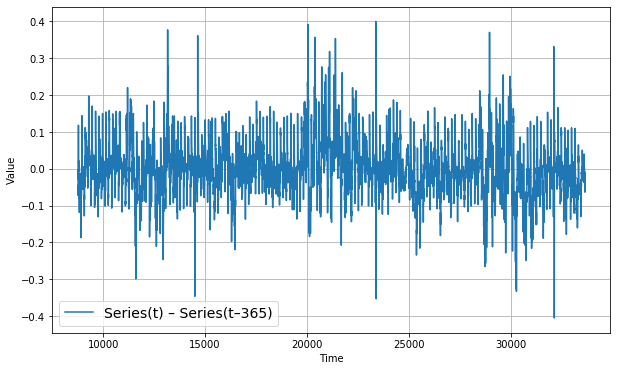

In [112]:
diff_series = (series[365*window_size:] - series[:-365*window_size])
diff_time = time[365*window_size:]

plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_series, label="Series(t) – Series(t–365)")
plt.show()

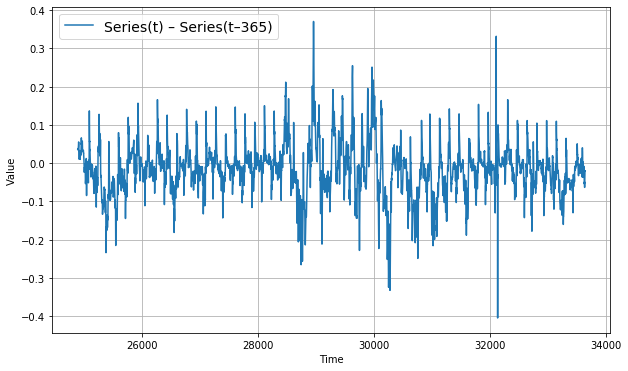

In [113]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, diff_series[split_time - 365*window_size:], label="Series(t) – Series(t–365)")
plt.show()

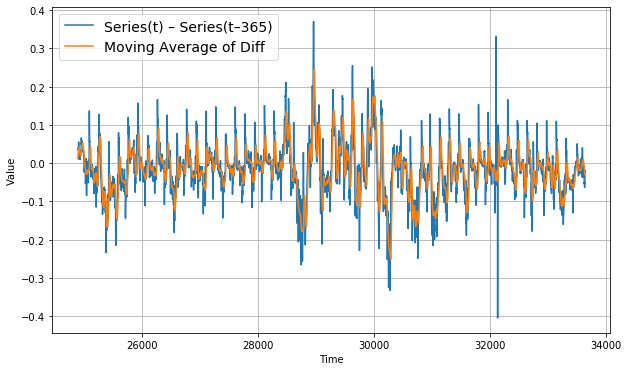

In [115]:
diff_moving_avg = moving_average_forecast(diff_series, window_size)[split_time - 365*window_size - window_size:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, diff_series[split_time - 365*window_size:], label="Series(t) – Series(t–365)")
plot_series(time_valid, diff_moving_avg, label="Moving Average of Diff")
plt.show()

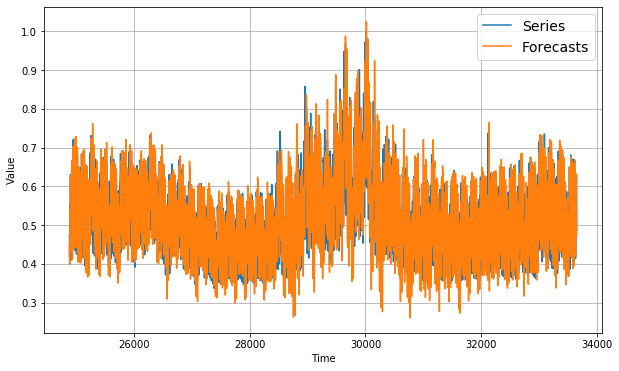

In [116]:
diff_moving_avg_plus_past = series[split_time - 365*window_size:-365*window_size] + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, label="Series")
plot_series(time_valid, diff_moving_avg_plus_past, label="Forecasts")
plt.show()

In [118]:
mape = tf.keras.losses.MAPE(x_valid, diff_moving_avg_plus_past).numpy()
mae =  tf.keras.losses.MAE(x_valid, diff_moving_avg_plus_past).numpy()
mape

5.6790380866898245